<h3 style="color:red;">Term neonate of 40 weeks of gestation and 3.5 kg at 24 hours</h3>


 Model 'normal neonate' loaded and initialized correctly.
 Ready in 3.6 sec. Average model step in 0.0298 ms.
Heart.heart_rate: max  110.79016 min  109.53773
AA.pres         : max   65.88667, min   39.85353 mmHg
PA.pres         : max   43.56174, min    17.8423 mmHg
LV_AA.flow      : net  177.72857, forward  177.72857, backward        0.0 ml/kg/min, stroke volume:     1.6157 ml/kg, 
RV_PA.flow      : net  181.58861, forward  181.58861, backward        0.0 ml/kg/min, stroke volume:    1.65079 ml/kg, 
SVC_RA.flow     : net   76.96267, forward   83.70631, backward   -6.74364 ml/kg/min, stroke volume:    0.69965 ml/kg, 
AAR_AD.flow     : net   98.52892, forward  100.50249, backward   -1.97357 ml/kg/min, stroke volume:    0.89571 ml/kg, 
LV.vol          : max    2.56689, min     0.9013 ml/kg
RV.vol          : max    3.39725, min     1.4543 ml/kg


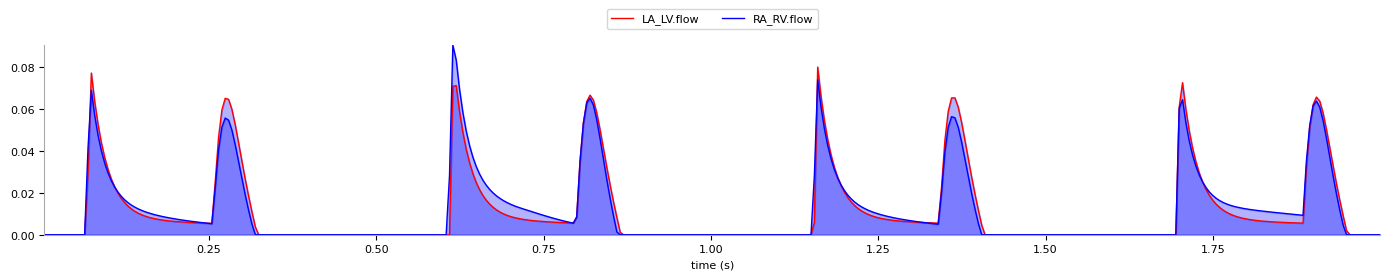

Stroke volume calculation might be inaccurate. Try using a sampleinterval of 0.0005
LA_LV.flow      : net   689.2136, forward   689.2136, backward        0.0 ml/min, stroke volume:    6.23631 ml, 
RA_RV.flow      : net  704.65344, forward  704.65344, backward        0.0 ml/min, stroke volume:    6.37602 ml, 


In [1]:
# as this notebook is run from a subfolder, we need to change the working directory to the root folder
import os

if os.getcwd().split("/")[-1] != "explain-python":
    os.chdir("..")

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine

# instantiate a model engine instance with the 'baseline_neonate' model definition
model = ModelEngine("definitions/baseline_neonate.json")

# report the gas pressures in kPa
model.set_pressure_unit("kpa")

# get a reference to all the submodels
models = model.models

# instantiate a custom interface object especially designed to interact with the neonatal model engine instance
from interfaces.NeoInterface import NeoInterface

neo = NeoInterface(model)

# enable or disable the physiological submodels which can be enabled or disabled.
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(False)
neo.pda(False)

# enable or disable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.resuscitation(False)

# scale the baseline patient to a gestational age of 40 weeks, 3.545 kg and height 0.519 meters.
model._scaling.scale_patient(
    weight=3.545,  # kilograms
    height=0.519,  # meters
    blood_volume=0.08,  # l/kg
    lung_volume=0.03,  # l/kg
    res_circ_factor=1.2,
    el_base_circ_factor=1.07,
    el_min_circ_factor=1.0,
    el_max_circ_factor=1.0,
    res_resp_factor=1.0,
    el_base_resp_factor=1.0,
    hr_ref=110.0,  # bpm
    syst_ref=66.0,  # mmHg
    diast_ref=40.0,  # mmHg
    map_ref=51.26,  # mmHg
    resp_rate=40.0,  # bpm
    vt_rr_ratio=0.0001212,
    mv_ref=0.2,  # l/kg/min
)

# stabilize the model by calculating 120 seconds
neo.calculate(60)
neo.validate(time_to_calculate=60)
neo.plot_time_graph(["LA_LV.flow", "RA_RV.flow"], time_to_calculate=2)

<h5 style="color:red;">Model run results</h5>

<h5 style="color:red;">Blood flows and volumes target data</h5>
<a href="https://pubmed.ncbi.nlm.nih.gov/37095534/">Jhaveri S, Battersby E, Stern KWD, Cohen J, Yang Y, Price A, Hughes E, Poston L, Pasupathy D, Taylor P, Vieira MC, Groves A. Normative ranges of biventricular volumes and function in healthy term newborns. J Cardiovasc Magn Reson. 2023 Apr 24;25(1):26. doi: 10.1186/s12968-023-00932-1. PMID: 37095534; PMCID: PMC10127416.</a><br>
<img src="../documentation/images/JhaveriTable2LV.jpg" width="400" height="500"></img>
<img src="../documentation/images/JhaveriTable3RV.jpg" width="400" height="500"></img><br>

<a href="https://pubmed.ncbi.nlm.nih.gov/20971721/">Groves AM, Chiesa G, Durighel G, Goldring ST, Fitzpatrick JA, Uribe S, Razavi R, Hajnal JV, Edwards AD. Functional cardiac MRI in preterm and term newborns. Arch Dis Child Fetal Neonatal Ed. 2011 Mar;96(2):F86-91. doi: 10.1136/adc.2010.189142. Epub 2010 Oct 21. PMID: 20971721; PMCID: PMC3093932.</a><br>
<img src="../documentation/images/GrovesFigure3.jpg" width="600" height="480"></img>
<img src="../documentation/images/GrovesFigure5.jpg" width="600" height="480"></img><br> -->
<!-- <img src="../documentation/images/GrovesTable1.jpg" width="300" height="100"></img>
<img src="../documentation/images/GrovesTable3.jpg" width="280" height="100"></img>



<h5 style="color:red;">Blood pressure target data</h5>


<a href="https://pubmed.ncbi.nlm.nih.gov/36858885/">van Zadelhoff AC, Poppe JA, Willemsen S, Mauff K, van Weteringen W, Goos TG, Reiss IKM, Vermeulen MJ, de Graaff JC. Age-dependent changes in arterial blood pressure in neonates during the first week of life: reference values and development of a model. Br J Anaesth. 2023 May;130(5):585-594. doi: 10.1016/j.bja.2023.01.024. Epub 2023 Feb 28. PMID: 36858885.</a><br><br>
<img src="../documentation/images/ZadelhoffSystolicFigure4.jpg" width="600" height="650"></img>
<img src="../documentation/images/ZadelhoffDiastolicFigure4.jpg" width="600" height="650"></img><br>

In [ ]:
neo.calculate(60)
neo.get_total_blood_volume()
neo.get_vitals()

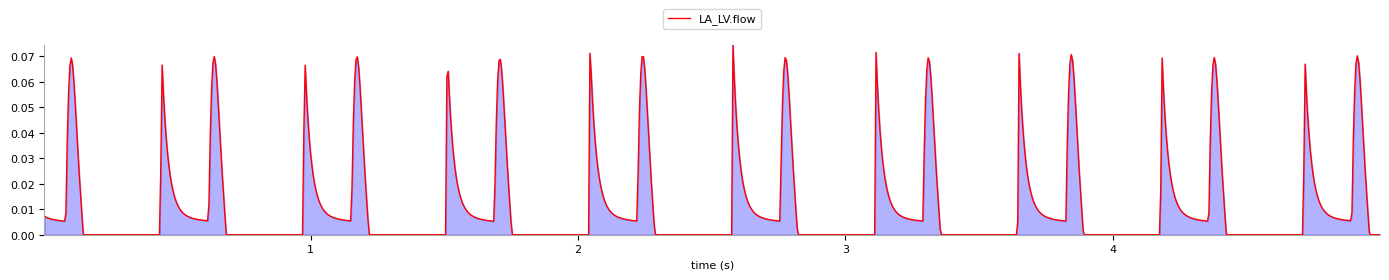

Stroke volume calculation might be inaccurate. Try using a sampleinterval of 0.0005
LA_LV.flow      : net  635.76356, forward  635.76356, backward        0.0 ml/min, stroke volume:    5.66754 ml, 


In [14]:
neo.plot_time_graph(["LA_LV.flow"], time_to_calculate=5)

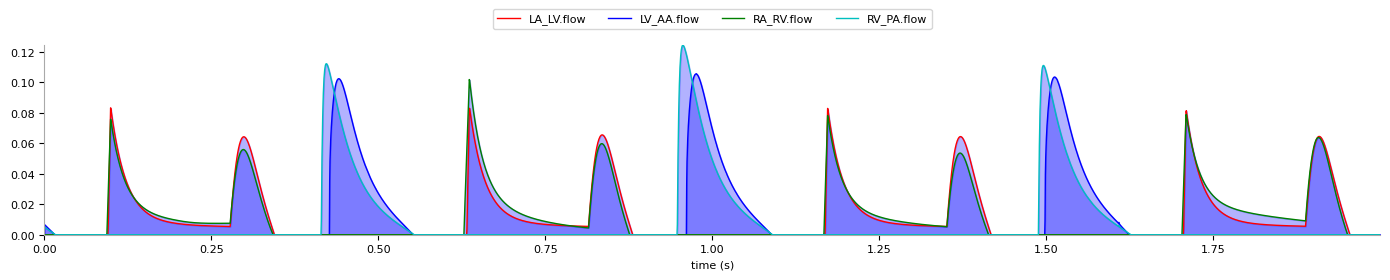

In [31]:
neo.plot_heart_flows()

In [2]:
model.save_model_state_json("model_state.json")

Processing model: LA - {'name': 'LA', 'description': 'left atrium', 'model_type': 'BloodTimeVaryingElastance', 'category': 'heart_chambers', 'is_enabled': True, 'dependencies': [], 'vol': 0.007824975926284438, 'u_vol': 0.0, 'el_min': 1260, 'el_max': 3280, 'el_k': 0}
Processing model: RA - {'name': 'RA', 'description': 'right atrium', 'model_type': 'BloodTimeVaryingElastance', 'category': 'heart_chambers', 'is_enabled': True, 'dependencies': [], 'vol': 0.007824975926284438, 'u_vol': 0.0, 'el_min': 1260, 'el_max': 3280, 'el_k': 0}
Processing model: LV - {'name': 'LV', 'description': 'left ventricle', 'model_type': 'BloodTimeVaryingElastance', 'category': 'heart_chambers', 'is_enabled': True, 'dependencies': [], 'vol': 0.0055155539340687116, 'u_vol': 0.00067, 'el_min': 1222, 'el_max': 28957, 'el_k': 0}
Processing model: RV - {'name': 'RV', 'description': 'right ventricle', 'model_type': 'BloodTimeVaryingElastance', 'category': 'heart_chambers', 'is_enabled': True, 'dependencies': [], 'vol